# Bank Customer Segmentation

Customer segmentation is the process in which you divide your customer base by common characteristics using an unsupervised learning algorith.  In this project we will be using K-means to understand different groups and their characteristics.




### About The Dataset



The [Bank Customer Segmentation](https://https://www.kaggle.com/datasets/shivamb/bank-customer-segmentation?resource=download) dataset has been pulled from Kaggle.  The description of the data set is as follows:

*This dataset consists of 1 Million+ transaction by over 800K customers for a bank in India. The data contains information such as - customer age (DOB), location, gender, account balance at the time of the transaction, transaction details, transaction amount, etc.*

We will begin by importing the necessary libraries and begin by cleaning our dataset.

# Data Exploration

## Importing the Dataset


Starting off by importing necessary libraries

In [109]:
!pip install --upgrade kneed
!pip install pca

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [169]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import regex as re
from datetime import datetime, date
from sklearn import preprocessing
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from kneed import KneeLocator
from sklearn.cluster import AgglomerativeClustering
import scipy.cluster.hierarchy as sch
from sklearn.decomposition import PCA
from sklearn.cluster import Birch
from sklearn import metrics
from sklearn.preprocessing import StandardScaler

Importing the Dataset 

In [111]:
df = pd.read_csv("/content/Customer Segmentation.csv")
df.head(10)

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
0,T1,C5841053,10/1/1994,F,JAMSHEDPUR,17819.05,2/8/2016,143207,25.00
1,T2,C2142763,4/4/1957,M,JHAJJAR,2270.69,2/8/2016,141858,27999.00
2,T3,C4417068,26/11/96,F,MUMBAI,17874.44,2/8/2016,142712,459.00
3,T4,C5342380,14/9/73,F,MUMBAI,866503.21,2/8/2016,142714,2060.00
4,T5,C9031234,24/3/88,F,NAVI MUMBAI,6714.43,2/8/2016,181156,1762.50
5,T6,C1536588,8/10/1972,F,ITANAGAR,53609.20,2/8/2016,173940,676.00
6,T7,C7126560,26/1/92,F,MUMBAI,973.46,2/8/2016,173806,566.00
7,T8,C1220223,27/1/82,M,MUMBAI,95075.54,2/8/2016,170537,148.00
8,T9,C8536061,19/4/88,F,GURGAON,14906.96,2/8/2016,192825,833.00
9,T10,C6638934,22/6/84,M,MUMBAI,4279.22,2/8/2016,192446,289.11


Determine data types of variables

In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048567 entries, 0 to 1048566
Data columns (total 9 columns):
 #   Column                   Non-Null Count    Dtype  
---  ------                   --------------    -----  
 0   TransactionID            1048567 non-null  object 
 1   CustomerID               1048567 non-null  object 
 2   CustomerDOB              1045170 non-null  object 
 3   CustGender               1047467 non-null  object 
 4   CustLocation             1048416 non-null  object 
 5   CustAccountBalance       1046198 non-null  float64
 6   TransactionDate          1048567 non-null  object 
 7   TransactionTime          1048567 non-null  int64  
 8   TransactionAmount (INR)  1048567 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 72.0+ MB


First look at distribution and general statistics of all variables

In [113]:
df.describe(include='all')

,TransactionID,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR)
count,1048567,1048567,1045170,1047467,1048416,1.046198e+06,1048567,1.048567e+06,1.048567e+06
unique,1048567,884265,17254,3,9355,NaN,55,NaN,NaN
top,T1,C5533885,1/1/1800,M,MUMBAI,NaN,7/8/2016,NaN,NaN
freq,1,6,57339,765530,103595,NaN,27261,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,1.154035e+05,NaN,1.570875e+05,1.574335e+03
std,NaN,NaN,NaN,NaN,NaN,8.464854e+05,NaN,5.126185e+04,6.574743e+03
min,NaN,NaN,NaN,NaN,NaN,0.000000e+00,NaN,0.000000e+00,0.000000e+00
25%,NaN,NaN,NaN,NaN,NaN,4.721760e+03,NaN,1.240300e+05,1.610000e+02
50%,NaN,NaN,NaN,NaN,NaN,1.679218e+04,NaN,1.642260e+05,4.590300e+02
75%,NaN,NaN,NaN,NaN,NaN,5.765736e+04,NaN,2.000100e+05,1.200000e+03


## Cleaning The Dataset

### Removing Missing Values

In [114]:
df.isna().sum()

TransactionID                 0
CustomerID                    0
CustomerDOB                3397
CustGender                 1100
CustLocation                151
CustAccountBalance         2369
TransactionDate               0
TransactionTime               0
TransactionAmount (INR)       0
dtype: int64

Remove all observations miss any missing data. 

In [115]:
df.dropna(inplace=True)
df.isna().sum()

TransactionID              0
CustomerID                 0
CustomerDOB                0
CustGender                 0
CustLocation               0
CustAccountBalance         0
TransactionDate            0
TransactionTime            0
TransactionAmount (INR)    0
dtype: int64

### Cleaning and Transforming Features

Remove the TransactionID column since it does not contain any useful information.  

In [116]:
df.drop(columns='TransactionID', inplace=True)

In [117]:
df.value_counts('CustomerID')

CustomerID
C1026833    6
C5531319    6
C4327447    6
C4021562    6
C5533885    6
           ..
C3924785    1
C3924788    1
C3924816    1
C3924818    1
C9099956    1
Length: 879358, dtype: int64

It appears that the structure of Customer ID's is in the form of "C#######".  Going to confirm that this is the structure and then convert to an integer.  

**Edit:** *This was not necessary since we will be removing this column later on and instead created a calculated column which displays how many transaction an individual has made.  However, I will leave this the below two lines of code*

In [118]:
df['CustomerID'].str.contains("^C[0-9]{7}$").value_counts()

True    1041614
Name: CustomerID, dtype: int64

Intuition was correct here, so lets remove the C and cast this column to an integer

In [119]:
df['CustomerID']=df['CustomerID'].str[1:].astype(int)

Moving on to CustomerDOB, lets determine if there are any birthdays that do not make any sense

In [120]:
df['CustomerDOB'].value_counts()

1/1/1800     56292
1/1/1989       809
1/1/1990       784
6/8/1991       698
1/1/1991       665
             ...  
2/12/1951        1
20/3/52          1
26/9/47          1
4/10/1941        1
24/10/44         1
Name: CustomerDOB, Length: 17233, dtype: int64



According to the [Guinness World Records](https://www.guinnessworldrecords.com/world-records/84549-oldest-person-living#:~:text=The%20oldest%20living%20woman%20%2D%20and,as%20of%2017%20January%202023) the oldest living person was born in 1907.  So, we can remove everyone born on 1/1/1800 then convert to datetime. 

In [121]:
df.drop(df[df['CustomerDOB'] == '1/1/1800'].index,axis = 0, inplace=True)
df["CustomerDOB"] = pd.to_datetime(df["CustomerDOB"])


Within the Datetime column, several rows did not have the century prefixing the year, many DOBs were set to days in the future.  We will convert subtract 100 from the year component of DOB if it is past 2015.  We are choosing 2015 since all transactions within this dataset happen within the year 2016.  

In [122]:
df.loc[df.CustomerDOB.dt.year >= 2015, 'CustomerDOB'] = df.loc[df.CustomerDOB.dt.year >= 2015, 'CustomerDOB'] - pd.DateOffset(years = 100)
df['CustomerDOB'].value_counts()

1989-01-01    809
1990-01-01    784
1991-06-08    698
1991-01-01    665
1992-01-01    631
             ... 
2005-02-23      1
1942-11-28      1
1949-09-23      1
1940-03-14      1
1944-10-24      1
Name: CustomerDOB, Length: 17232, dtype: int64

Now lets create a column for age.  This will be easier to utilize while segmenting since DOB really is just a proxy for age in the first place

In [123]:
def age(born):
  
  today = pd.Timestamp.today().to_pydatetime()
  return (today.year - born.year - ((born.month > today.month) | 
                                                       ((born.month == today.month) & (born.day > today.day))))


In [124]:
df['age']=df['CustomerDOB'].apply(age)
df

,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),age
0,5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2/8/2016,143207,25.0,28
1,2142763,1957-04-04,M,JHAJJAR,2270.69,2/8/2016,141858,27999.0,65
2,4417068,1996-11-26,F,MUMBAI,17874.44,2/8/2016,142712,459.0,26
3,5342380,1973-09-14,F,MUMBAI,866503.21,2/8/2016,142714,2060.0,49
4,9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2/8/2016,181156,1762.5,34
...,...,...,...,...,...,...,...,...,...
1048562,8020229,1990-08-04,M,NEW DELHI,7635.19,18/9/16,184824,799.0,32
1048563,6459278,1992-02-20,M,NASHIK,27311.42,18/9/16,183734,460.0,30
1048564,6412354,1989-05-18,M,HYDERABAD,221757.06,18/9/16,183313,770.0,33
1048565,6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0,44


Lets take a look at the distribution of ages to ensure that it matches intuition and publicaly available data

Median age: 35.0


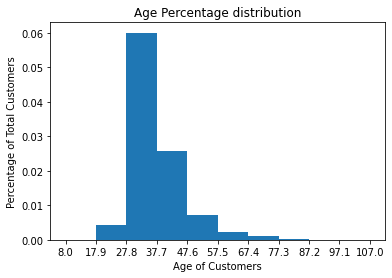

In [125]:
count,bin_edge = np.histogram(df['age'])
df['age'].plot(kind='hist', xticks=bin_edge, density=1)

plt.title('Age Percentage distribution')
plt.ylabel('Percentage of Total Customers')
plt.xlabel('Age of Customers')
print("Median age:", round(df['age'].median(),2))

The median age of the indian population is 27.6 Why is it that of our customer sample we are getting a median age 26% higher than what is recorded.  This likely due to a slue of factors.  First, this is not a random sample of the Indian population, this is DOB of customers within a single bank in India.  Additionally, we should not expect that customer age will directly map onto popultion age; how many six month olds do you know with a bank account actively completing transactions.
We also see that the data is skewed right, which does line up with intuition of age groups we may expect to have bank accounts


Moving on to the CustGender

In [126]:
df['CustGender'].value_counts()

M    712454
F    272868
Name: CustGender, dtype: int64

Lets make this numeric and store 1 for male and 0 for female

In [127]:
df['Gender']=df['CustGender'].map({'M': 1, 'F':0}).astype(int)
df.dtypes

CustomerID                          int64
CustomerDOB                datetime64[ns]
CustGender                         object
CustLocation                       object
CustAccountBalance                float64
TransactionDate                    object
TransactionTime                     int64
TransactionAmount (INR)           float64
age                                 int64
Gender                              int64
dtype: object

Customer location has 8,164 unique different town.  Lets not use onehot encoding but instead add a new column of factors.

In [128]:
df['CustLocation'].describe()

count     985322
unique      8164
top       MUMBAI
freq       97679
Name: CustLocation, dtype: object

In [129]:
df['location']= pd.factorize(df['CustLocation'])[0]
df

,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),age,Gender,location
0,5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2/8/2016,143207,25.0,28,0,0
1,2142763,1957-04-04,M,JHAJJAR,2270.69,2/8/2016,141858,27999.0,65,1,1
2,4417068,1996-11-26,F,MUMBAI,17874.44,2/8/2016,142712,459.0,26,0,2
3,5342380,1973-09-14,F,MUMBAI,866503.21,2/8/2016,142714,2060.0,49,0,2
4,9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2/8/2016,181156,1762.5,34,0,3
...,...,...,...,...,...,...,...,...,...,...,...
1048562,8020229,1990-08-04,M,NEW DELHI,7635.19,18/9/16,184824,799.0,32,1,11
1048563,6459278,1992-02-20,M,NASHIK,27311.42,18/9/16,183734,460.0,30,1,44
1048564,6412354,1989-05-18,M,HYDERABAD,221757.06,18/9/16,183313,770.0,33,1,36
1048565,6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,18/9/16,184706,1000.0,44,1,69


We are not going to be utilizing the location within clustering becasuse it may cause issues when clustering.  There are over 8,000 unique locations however, the diffience in value between these are not necessary convey meaninful geographic information.

> For example, values 7,999 and 8,000 are right next to eachother when performing clustering, but are they actually next to eachother when looking on a map?

In [130]:

df.loc[df['location'].isin([7999, 8000])]

,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),age,Gender,location
964702,7333919,1988-01-02,F,HARIPAD,40087.43,10/9/2016,154056,599.0,35,0,7999
964834,6433734,1988-05-23,M,SAHIBJADA AJIT SINGH NAGAR MOHALI,7627.06,10/9/2016,121308,399.0,34,1,8000


When looking up directions to these two places, they are over a 2 day car ride away from eachother!

This could be handled by converting all of the locations into latitude and longitude, but for the purposes of this data exploration, we are going to omit the variable.  

When considering my transactions, I have a normal cadience of transactions depending on the time of year and also the time of month.  So we are going to split our transaction date column into seperate columns for month and day.  We are not going to use Year since all transactions take place in 2016.

In [131]:
df['TransactionDate']=pd.to_datetime(df['TransactionDate'])
df['day']=df['TransactionDate'].dt.day
df['month']=df['TransactionDate'].dt.month
df

,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),age,Gender,location,day,month
0,5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,28,0,0,8,2
1,2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0,65,1,1,8,2
2,4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0,26,0,2,8,2
3,5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0,49,0,2,8,2
4,9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,34,0,3,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048562,8020229,1990-08-04,M,NEW DELHI,7635.19,2016-09-18,184824,799.0,32,1,11,18,9
1048563,6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,183734,460.0,30,1,44,18,9
1048564,6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,183313,770.0,33,1,36,18,9
1048565,6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,184706,1000.0,44,1,69,18,9


Another factor to consider is the time of the day that a transaction is taking place.  So we are going to conver from the unix timestamp into the hour of the day the transaction took place in miliary time.

In [132]:
df['hour']=pd.to_datetime(df['TransactionTime'], unit='s').dt.hour
df

,CustomerID,CustomerDOB,CustGender,CustLocation,CustAccountBalance,TransactionDate,TransactionTime,TransactionAmount (INR),age,Gender,location,day,month,hour
0,5841053,1994-10-01,F,JAMSHEDPUR,17819.05,2016-02-08,143207,25.0,28,0,0,8,2,15
1,2142763,1957-04-04,M,JHAJJAR,2270.69,2016-02-08,141858,27999.0,65,1,1,8,2,15
2,4417068,1996-11-26,F,MUMBAI,17874.44,2016-02-08,142712,459.0,26,0,2,8,2,15
3,5342380,1973-09-14,F,MUMBAI,866503.21,2016-02-08,142714,2060.0,49,0,2,8,2,15
4,9031234,1988-03-24,F,NAVI MUMBAI,6714.43,2016-02-08,181156,1762.5,34,0,3,8,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048562,8020229,1990-08-04,M,NEW DELHI,7635.19,2016-09-18,184824,799.0,32,1,11,18,9,3
1048563,6459278,1992-02-20,M,NASHIK,27311.42,2016-09-18,183734,460.0,30,1,44,18,9,3
1048564,6412354,1989-05-18,M,HYDERABAD,221757.06,2016-09-18,183313,770.0,33,1,36,18,9,2
1048565,6420483,1978-08-30,M,VISAKHAPATNAM,10117.87,2016-09-18,184706,1000.0,44,1,69,18,9,3


Another interesting way to potentially segment the customers would be the total number of transactions given by each individual. Then we can remove the CustomerID since we do not want this to be used in prediction. 

In [133]:
df['totalTransaction'] = df.groupby('CustomerID')['CustomerID'].transform('size')
df['totalTransaction'].describe()

count    985322.000000
mean          1.335523
std           0.591806
min           1.000000
25%           1.000000
50%           1.000000
75%           2.000000
max           6.000000
Name: totalTransaction, dtype: float64

Now going to split off all of the numeric variables into a seperate dataframe.

In [153]:
columnNames=['CustAccountBalance','TransactionAmount (INR)','Gender','age','day','month','hour','totalTransaction']
dfint=df[columnNames]

dfint

,CustAccountBalance,TransactionAmount (INR),Gender,age,day,month,hour,totalTransaction
0,17819.05,25.0,0,28,8,2,15,1
1,2270.69,27999.0,1,65,8,2,15,1
2,17874.44,459.0,0,26,8,2,15,1
3,866503.21,2060.0,0,49,8,2,15,2
4,6714.43,1762.5,0,34,8,2,2,1
...,...,...,...,...,...,...,...,...
1048562,7635.19,799.0,1,32,18,9,3,1
1048563,27311.42,460.0,1,30,18,9,3,1
1048564,221757.06,770.0,1,33,18,9,2,2
1048565,10117.87,1000.0,1,44,18,9,3,1


In [135]:
dfint.describe().T

,count,mean,std,min,25%,50%,75%,max
CustAccountBalance,985322.0,106061.188580,817905.353760,0.0,4582.1325,16006.3,53759.08,1.150355e+08
TransactionAmount (INR),985322.0,1452.425149,6139.765064,0.0,151.0000,431.0,1125.00,1.560035e+06
Gender,985322.0,0.723067,0.447483,0.0,0.0000,1.0,1.00,1.000000e+00
age,985322.0,37.160557,8.776490,8.0,31.0000,35.0,41.00,1.070000e+02
day,985322.0,14.409463,7.284729,8.0,8.0000,9.0,20.00,3.100000e+01
month,985322.0,7.349036,2.633786,1.0,6.0000,8.0,9.00,1.200000e+01
hour,985322.0,10.419153,6.500388,0.0,5.0000,10.0,15.00,2.300000e+01
totalTransaction,985322.0,1.335523,0.591806,1.0,1.0000,1.0,2.00,6.000000e+00


Now lets normalize the data as well.

In [154]:
s = StandardScaler()
df_normal = s.fit_transform(dfint)
df_normal=(df_normal-df_normal.min())/(df_normal.max()-df_normal.min())
df_normal = pd.DataFrame(df_normal,columns=columnNames)
df_normal.describe()

,CustAccountBalance,TransactionAmount (INR),Gender,age,day,month,hour,totalTransaction
count,985322.000000,985322.000000,985322.000000,985322.000000,985322.000000,985322.000000,985322.000000,985322.000000
mean,0.012920,0.012920,0.012920,0.012920,0.012920,0.012920,0.012920,0.012920
std,0.003888,0.003888,0.003888,0.003888,0.003888,0.003888,0.003888,0.003888
min,0.012415,0.012000,0.006636,0.000000,0.009498,0.003546,0.006687,0.010715
25%,0.012437,0.012095,0.006636,0.010190,0.009498,0.010928,0.009678,0.010715
50%,0.012491,0.012273,0.015326,0.011962,0.010032,0.013881,0.012669,0.010715
75%,0.012671,0.012712,0.015326,0.014621,0.015904,0.015357,0.015660,0.017286
max,0.559310,1.000000,0.015326,0.043862,0.021775,0.019786,0.020445,0.043567


# Data Visualization

We are going to spend some time plotting each feature within the dateframe to get an understanding of the distribution and outliers within the data set. 

## Histogram

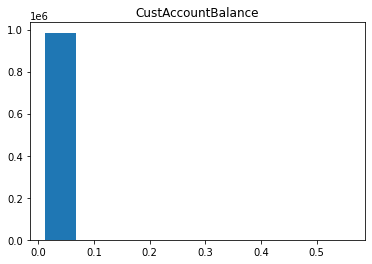

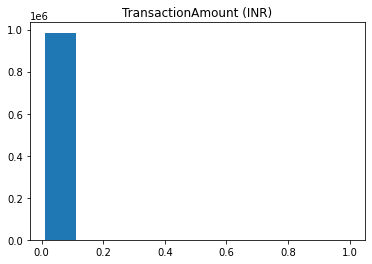

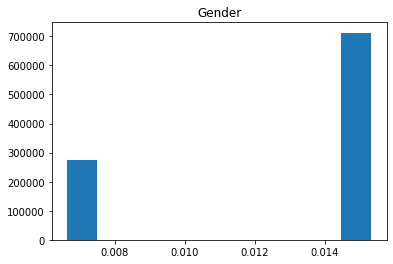

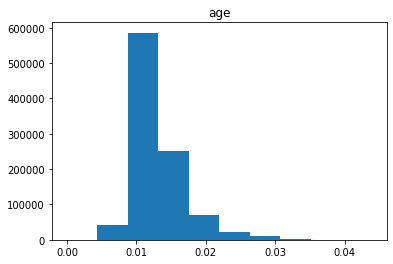

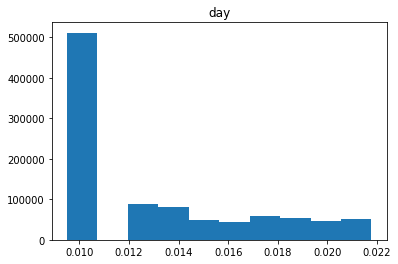

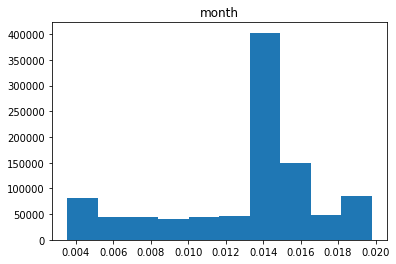

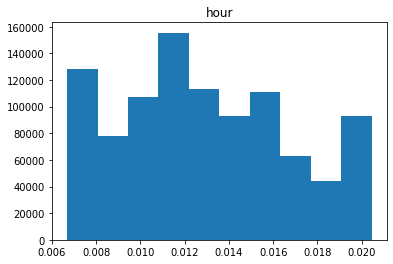

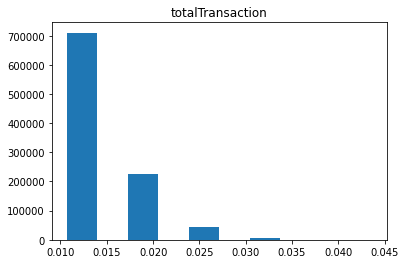

In [155]:
for feature in df_normal:
    plt.hist(df_normal[feature])
    plt.title(feature)
    plt.show()


## Box Plot

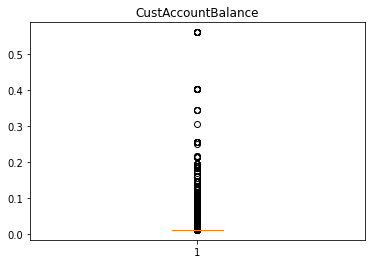

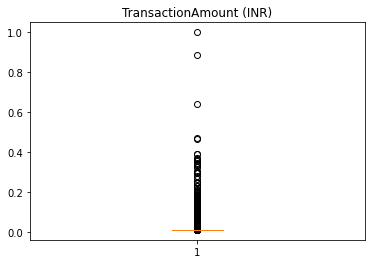

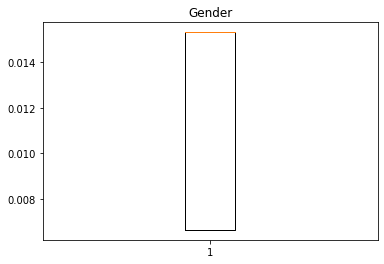

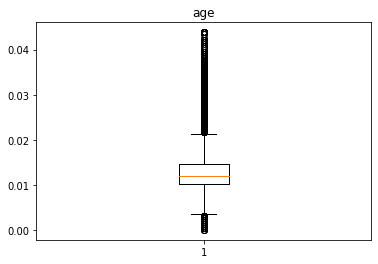

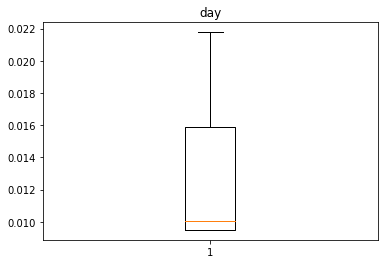

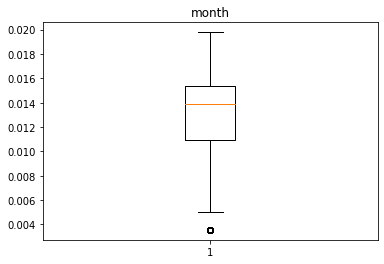

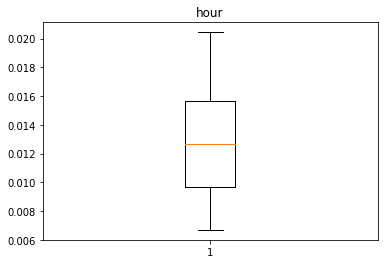

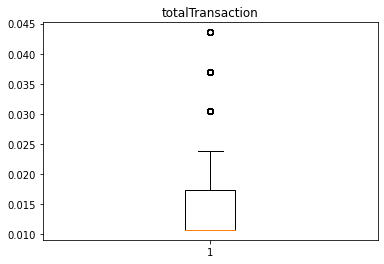

In [156]:
for feature in df_normal:
    plt.boxplot(df_normal[feature])
    plt.title(feature)
    plt.show()

## Scatter Plot

Now lets take a look at the correlation and scatter plot of each combination of features.

Be patient, this will take a second to load

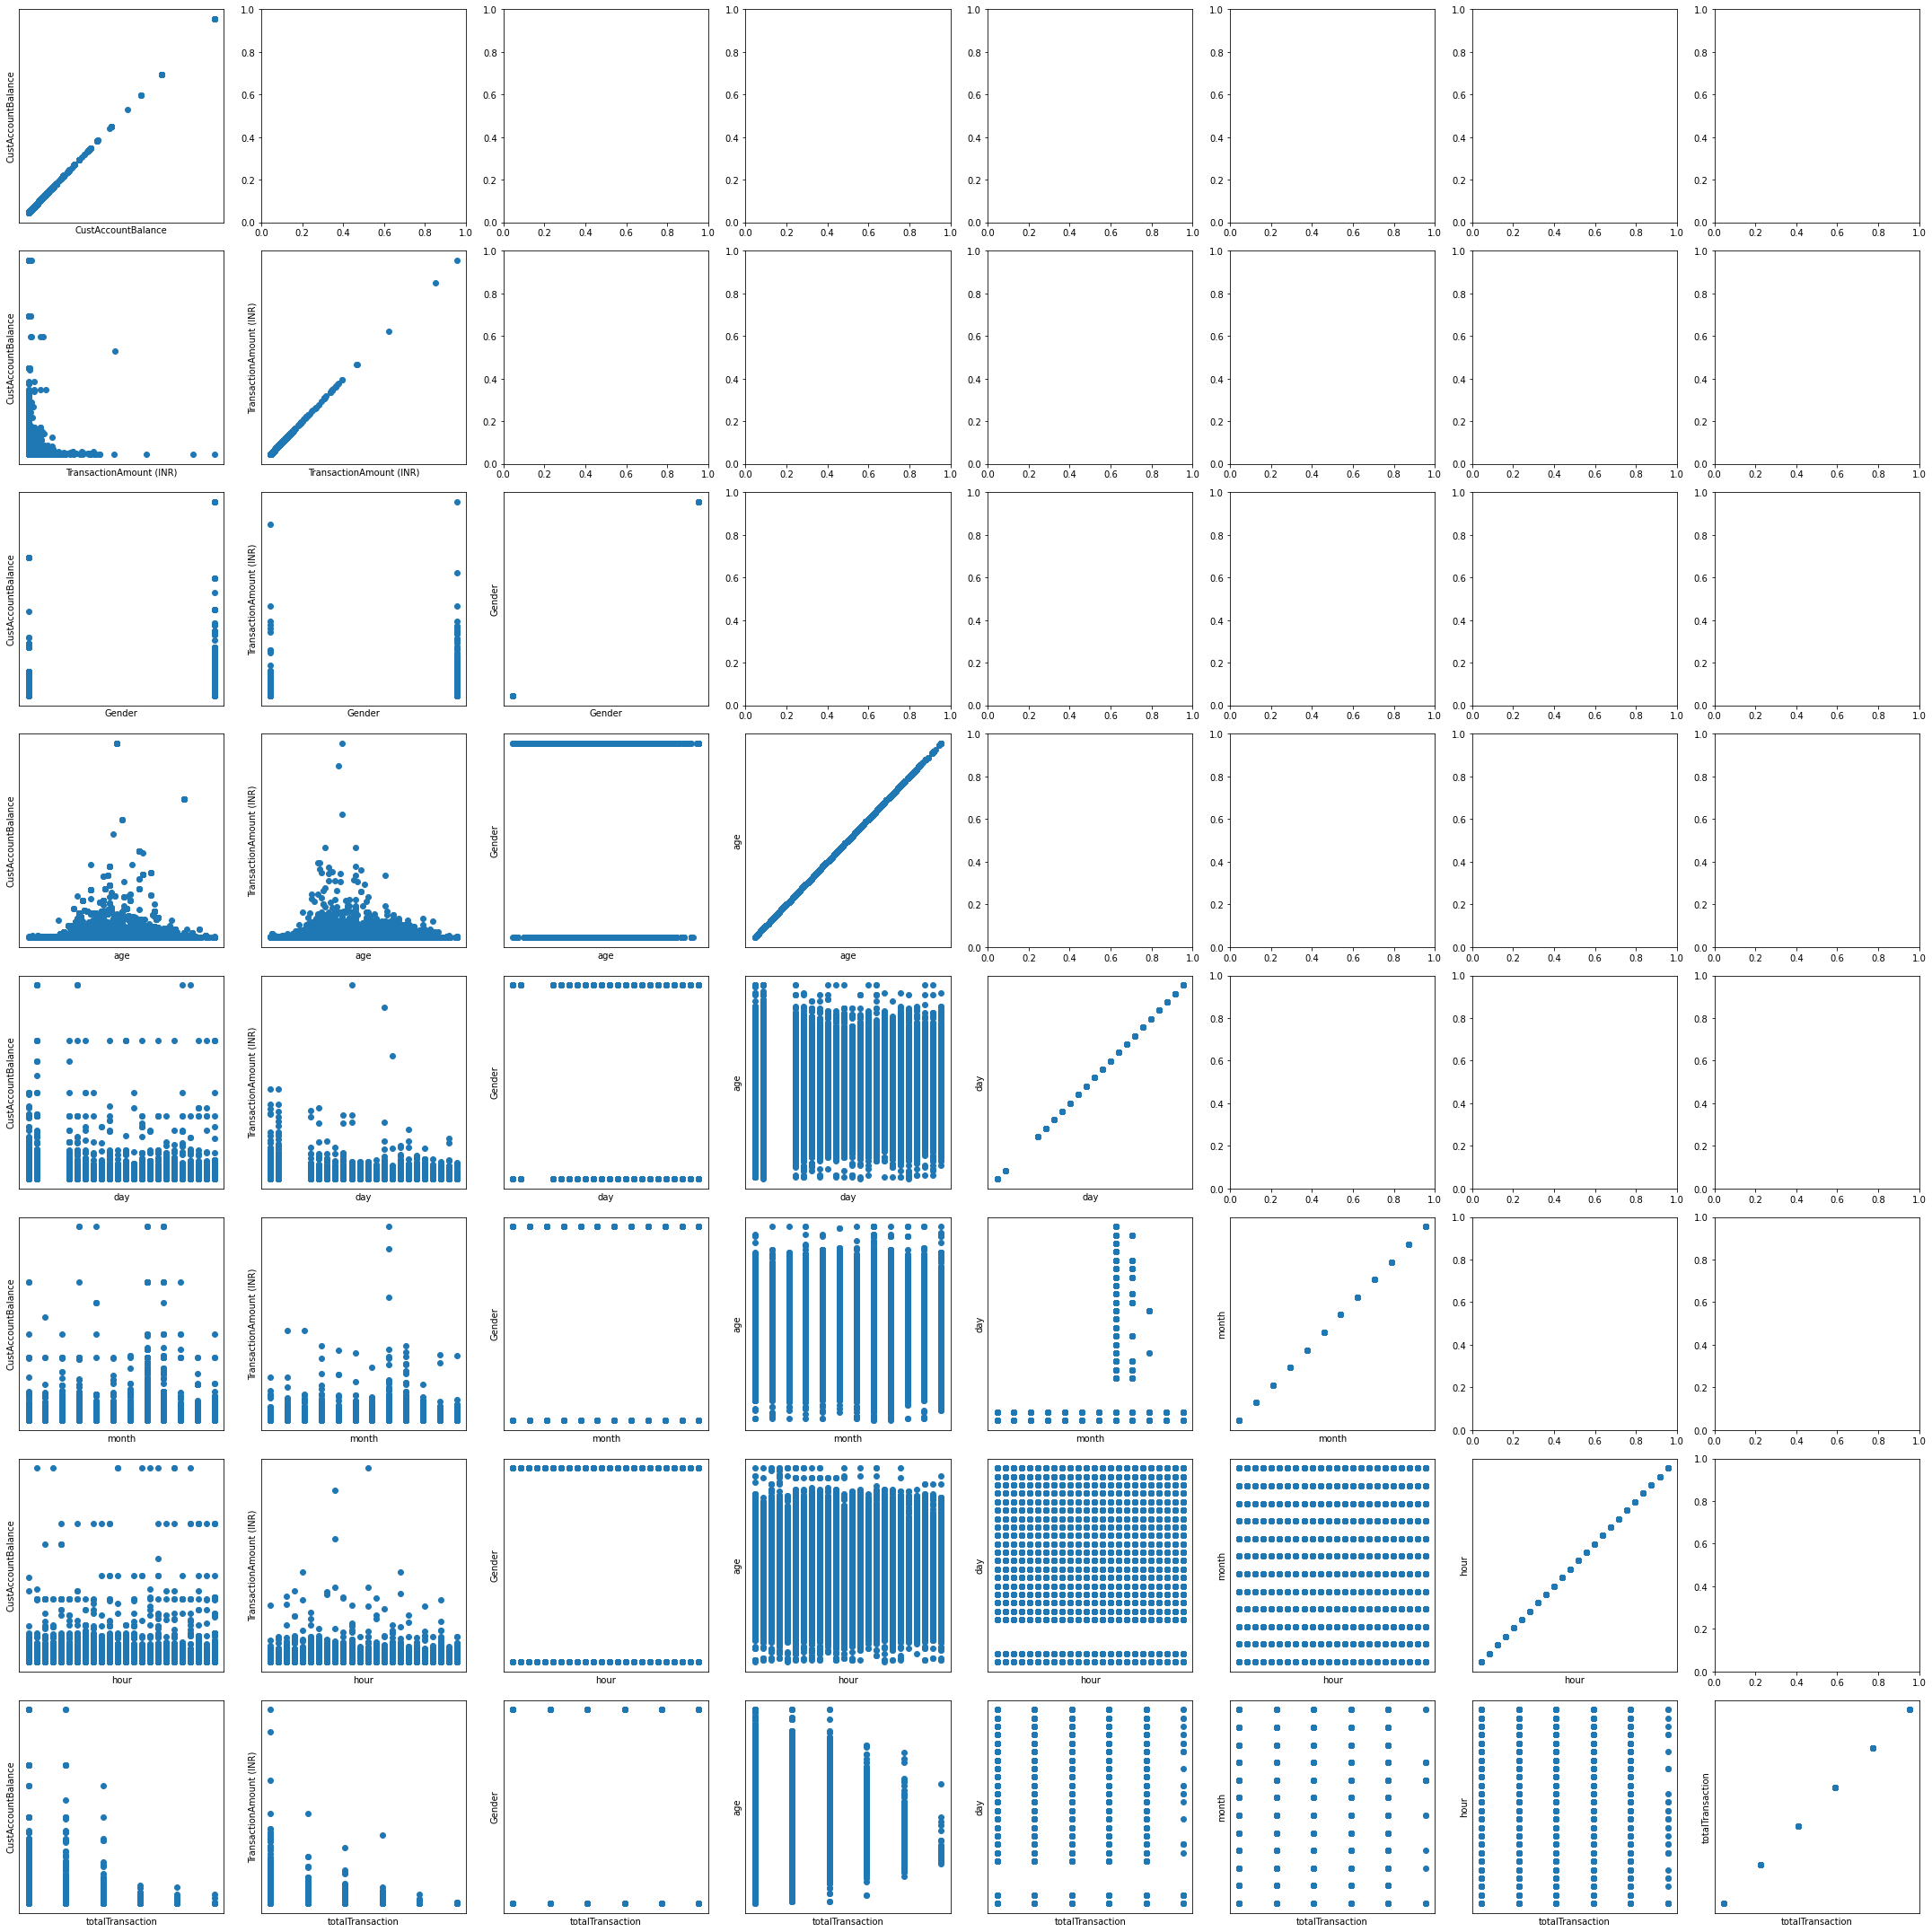

In [157]:
variables=len(df_normal.axes[1])

fig, axs = plt.subplots(variables, variables, figsize=(30,30))
for i, xaxis in enumerate(df_normal.columns):
  for j, yaxis in enumerate(df_normal.columns):
    if i < j:
      continue
    axs[i, j].scatter(df_normal[xaxis], df_normal[yaxis])
    axs[i, j].set_xlabel(xaxis)
    axs[i, j].set_ylabel(yaxis)
    axs[i, j].set_xticks([])
    axs[i, j].set_yticks([])

plt.tight_layout()
plt.show()

In [158]:
correlation=df_normal.corr()
round(correlation,3)

,CustAccountBalance,TransactionAmount (INR),Gender,age,day,month,hour,totalTransaction
CustAccountBalance,1.000,0.061,0.003,0.122,0.009,0.002,0.005,0.001
TransactionAmount (INR),0.061,1.000,-0.015,0.103,-0.003,-0.003,0.006,-0.000
Gender,0.003,-0.015,1.000,0.036,-0.002,0.001,0.003,0.000
age,0.122,0.103,0.036,1.000,0.020,0.006,0.003,0.000
day,0.009,-0.003,-0.002,0.020,1.000,0.261,-0.002,0.000
month,0.002,-0.003,0.001,0.006,0.261,1.000,0.003,-0.000
hour,0.005,0.006,0.003,0.003,-0.002,0.003,1.000,-0.003
totalTransaction,0.001,-0.000,0.000,0.000,0.000,-0.000,-0.003,1.000


# K-Mean

## Elbow Method

We are first going to determine the most appropriate number of clusters using both the elbow method with distortion score and the silhoette coefficient.
Also, next time is may be better to use GridSearchCV

In [159]:
kmeans_var = {"init": "random","random_state": 314}
sse = []

for k in range(1, 20):
  kmeans = KMeans(n_clusters=k, **kmeans_var)
  kmeans.fit(df_normal)
  sse.append(kmeans.inertia_)
  print(k)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


Elbow: 6
score: 73.02171450030679


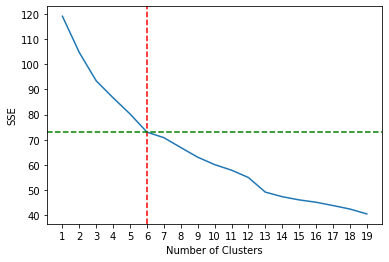

In [160]:
elbow = KneeLocator(
    range(1,20),
    sse,
    curve="convex",
    direction="decreasing"
)

plt.plot(range(1, 20), sse)
plt.xticks(range(1, 20))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.axvline(x=elbow.knee, color='red', linestyle='--')
plt.axhline(y=sse[elbow.knee-1], color='green', linestyle='--')
print("Elbow:",elbow.knee)
print("score:",sse[elbow.knee-1])


## Silhouette coefficient

Sadly I do not have access to enough resources to run this code.  After running for an hour, I was unable to calculate a single score.

However, I could reduce the number of features when performing silhouette and clusting, but I am interested in using and analyzing all features within the dataset.  

In [161]:
# silhouette = []

# for k in range(2,10):
#   kmeans = KMeans(n_clusters=k, **kmeans_var)
#   kmeans.fit(df_reduce)
#   score = silhouette_score(df_reduce, kmeans.labels_)
#   silhouette.append(score)
#   print(k)

# plt.plot(range(2, 20), silhouette)
# plt.xticks(range(2, 20))
# plt.xlabel("Number of Clusters")
# plt.ylabel("Silhouette Coefficient")
# plt.axvline(x=silhouette.index(max(silhouette)), color='red', linestyle='--')
# plt.axhline(y=max(silhouette), color='green', linestyle='--')

# print("Clusters:",silhouette.index(max(silhouette)))
# print("Score:",max(silhouette))

### Visualizing Clusters

First we need to fit the model to the optimal number of clusters

In [162]:
kmeans = KMeans(n_clusters=elbow.knee, **kmeans_var)
kmeans.fit(df_normal)
labels = kmeans.predict(df_normal)
df_kmeans=df_normal.copy()
df_kmeans['cluster']=labels


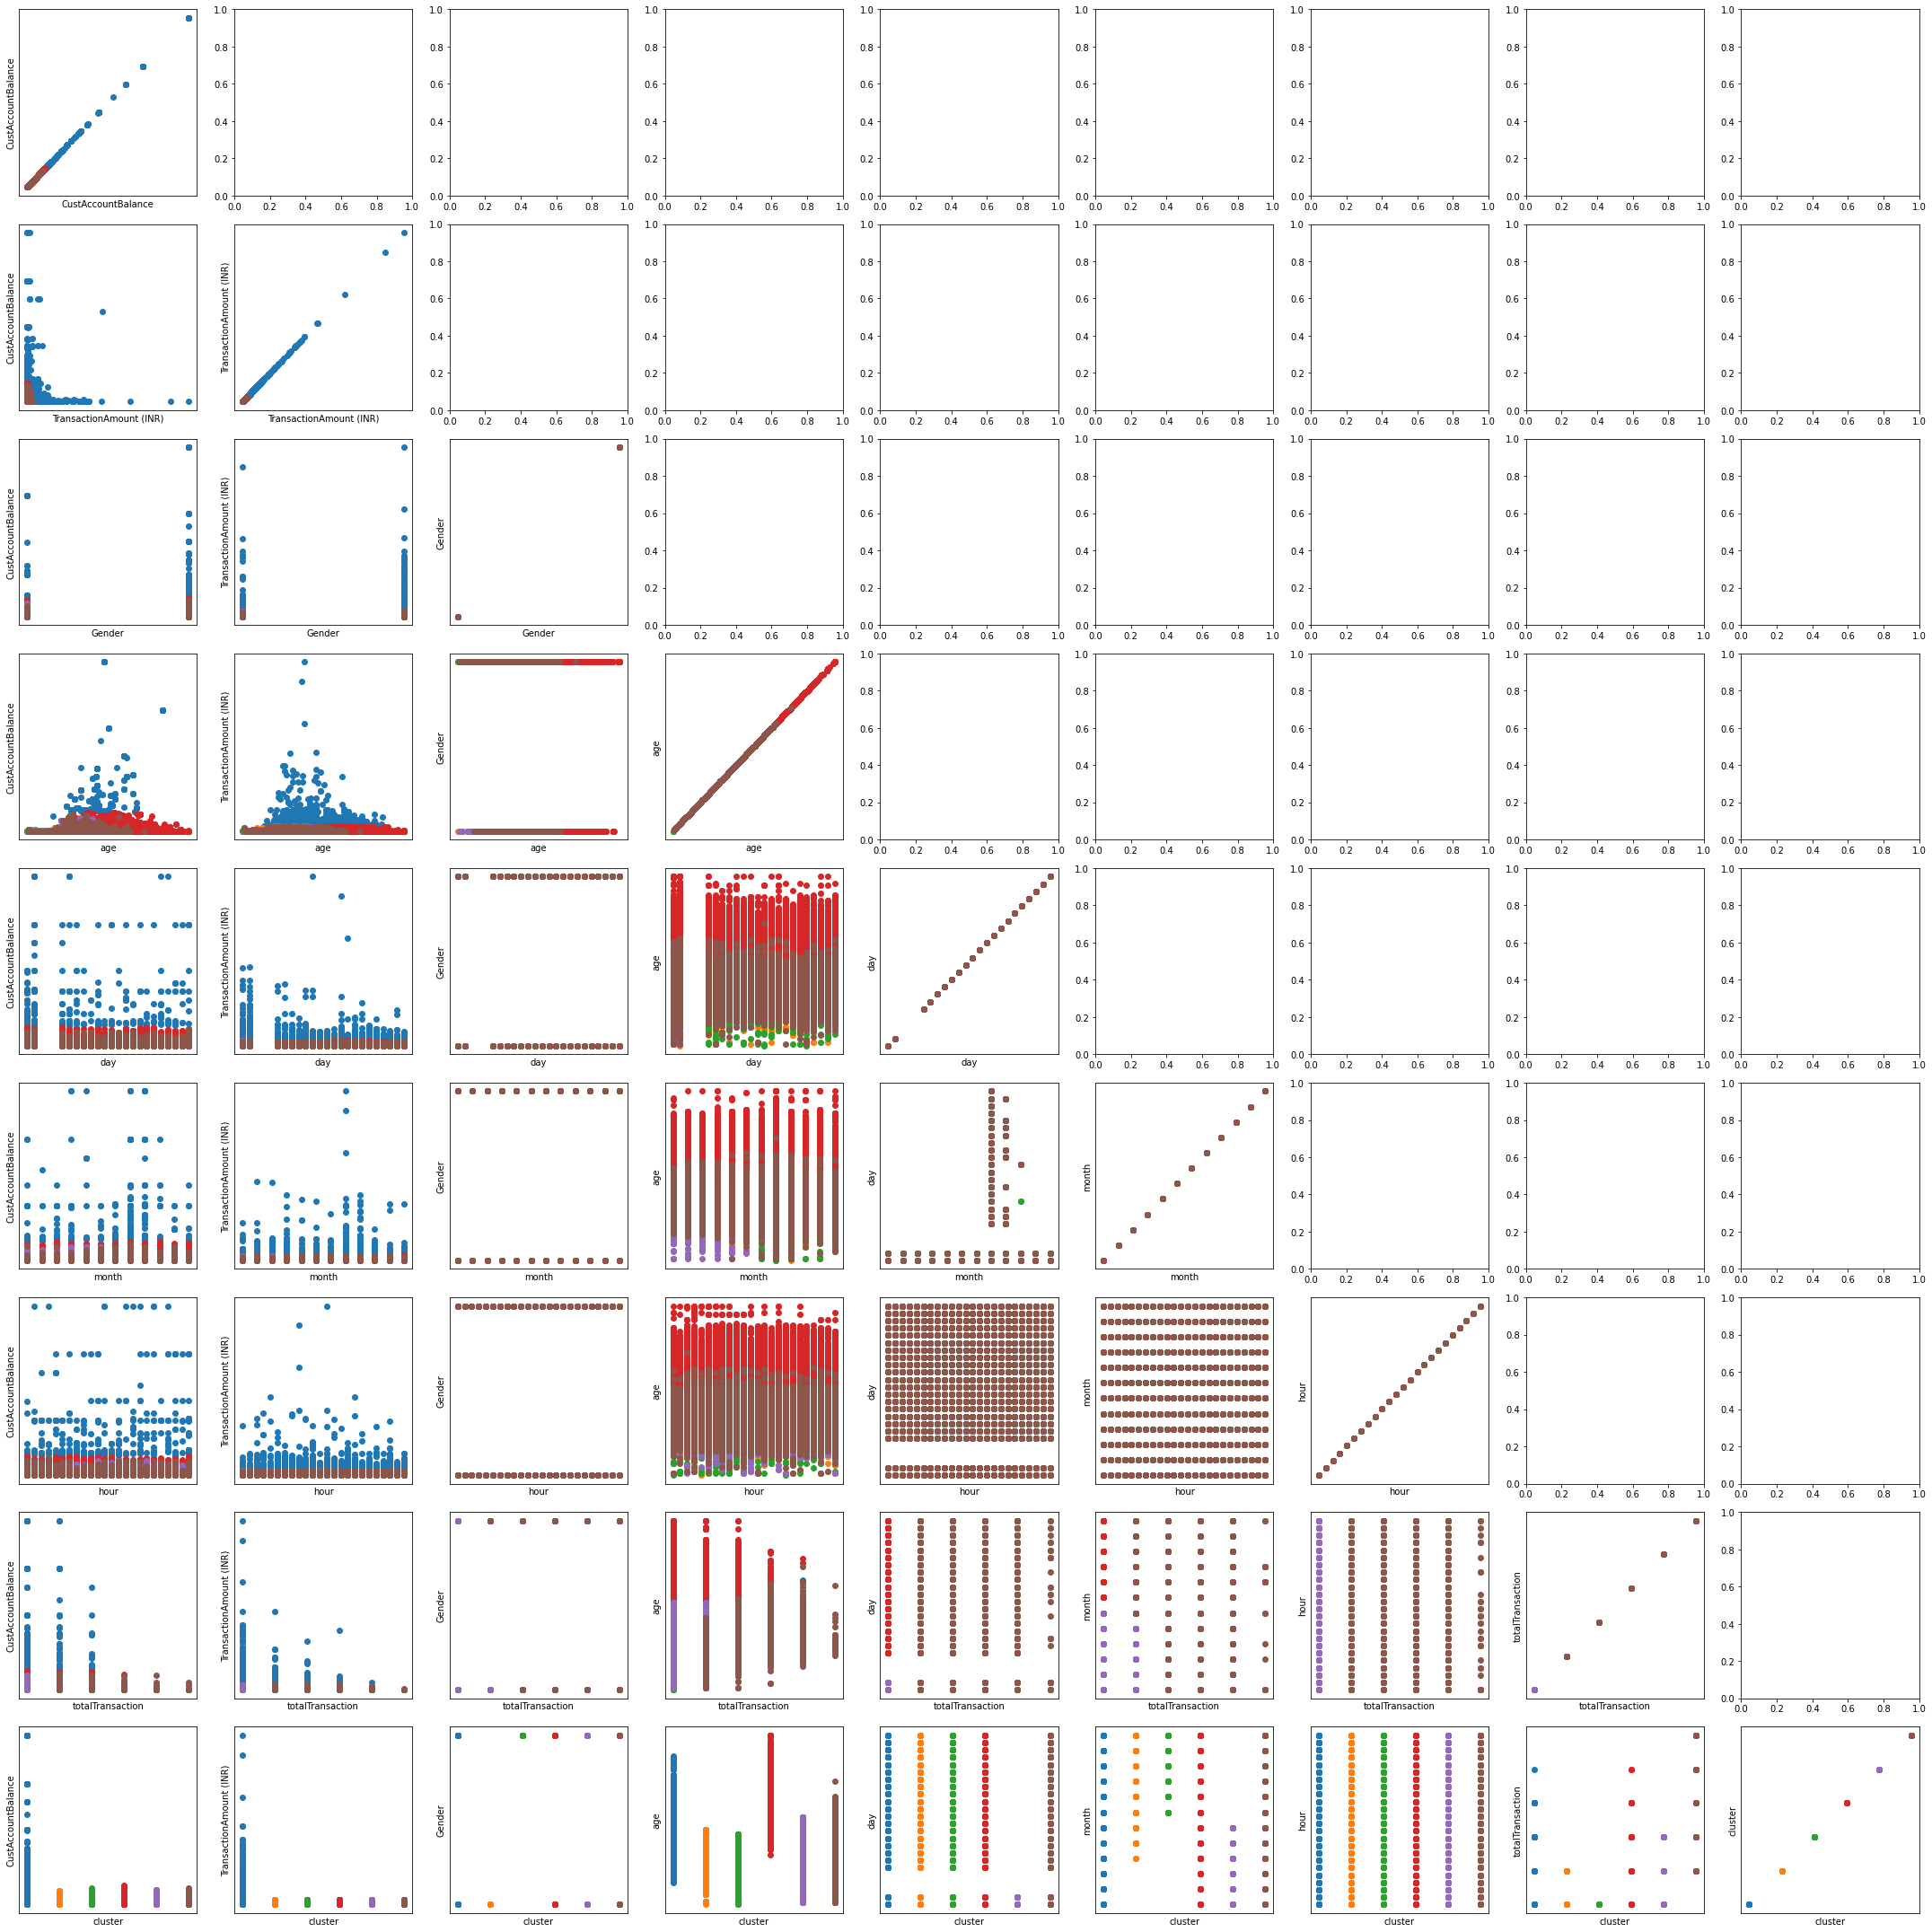

In [163]:
u_labels = np.unique(labels)

variables=len(df_kmeans.axes[1])

fig, axs = plt.subplots(variables, variables, figsize=(30,30))
for i, xaxis in enumerate(df_kmeans.columns):
  for j, yaxis in enumerate(df_kmeans.columns):
    if i < j:
      continue  #cutting down on the number of plots being graphed for performance 
    for k in u_labels:
      mask = labels == k
      axs[i, j].scatter(df_kmeans.loc[mask, xaxis], df_kmeans.loc[mask, yaxis])
    axs[i, j].set_xlabel(xaxis)
    axs[i, j].set_ylabel(yaxis)
    axs[i, j].set_xticks([])
    axs[i, j].set_yticks([])

plt.tight_layout()
plt.show()

### Describe Charateristics of Clusters


With the above graph, we are able to see clear seperation within different combinations of variables.  Now lets try to get some insight into groups of customers we have segmented.  

Checking the mean values prior to normalization

In [166]:
dfint['cluster']=labels
print(dfint['cluster'].value_counts(normalize=True))


2    0.343512
4    0.203879
1    0.201551
5    0.165828
3    0.082239
0    0.002991
Name: cluster, dtype: float64


<ipython-input-166-361ee2418af6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfint['cluster']=labels


We can see there are large differences in the total population capture individual clusters.  

Using our unnormalized dataframe to get a more intuative understanding of average value per value seperated by cluster.  

In [167]:
dfint.groupby('cluster').mean().round(3).T


cluster,0,1,2,3,4,5
CustAccountBalance,4416099.169,75767.808,69455.493,317430.218,72347.355,77597.984
TransactionAmount (INR),70099.339,1295.140,1015.232,2535.430,1193.811,1091.972
Gender,0.732,0.000,1.000,0.782,0.783,0.925
age,46.203,34.837,35.031,58.330,35.616,35.633
day,14.735,15.658,16.445,15.085,8.526,15.569
month,7.450,8.353,8.689,7.809,3.184,8.245
hour,10.829,10.362,10.432,10.629,10.374,10.407
totalTransaction,1.326,1.242,1.000,1.243,1.228,2.322


Time to make some inferences about the groups that we have found. 



0.   High balance, High spending

> This group has the highest transaction amounts and highest account balance compared to all other bank members.  Comprised of 70% men and an average age of 46.  This population makes of the smallest percentage of all transactions.

1.  Middle aged women

> Transaction amount and current balance mirror groups 2, 4 and 5 but is most similar to group 2.

2.  Middle aged men

> Lowest transaction amount, balance, and number of transactions

3.  Older individuals

> This group has the highest average age, also with the second largest account balance on average.  This leads me to believe we may have captured part of the retiring population.

4.  Early shoppers

> All other groups perform their transactions at the end of the year on average while this group spends early in the year.  Comprised of 70% men 

5.  Frequent shoppers

> This group has the highest number of transactions.  Even though there average transaction is one of the lowest, they perchase the most frequently.  

These feel to match the intuition of what I could image bank customers.  However, we are going to use principal component analysis to identify any variables we can remove to help in generalizing the model.  

# Principal Componenet Analysis

### Identify Principal Components

In [172]:
PCA_model = PCA()
PCA_model_data = PCA_model.fit(df_normal)

PCA_variability= PCA_model.explained_variance_ratio_
PCA_variability

array([0.157992  , 0.14897195, 0.1261967 , 0.12535368, 0.12458497,
       0.11703594, 0.10750348, 0.09236127])

All principal components explain relatively the same amount of variability within the dataset.   

This produces a relatively straight line within the cumulative explained variance graph.  

Text(0, 0.5, 'Cumulative Explained Variance')

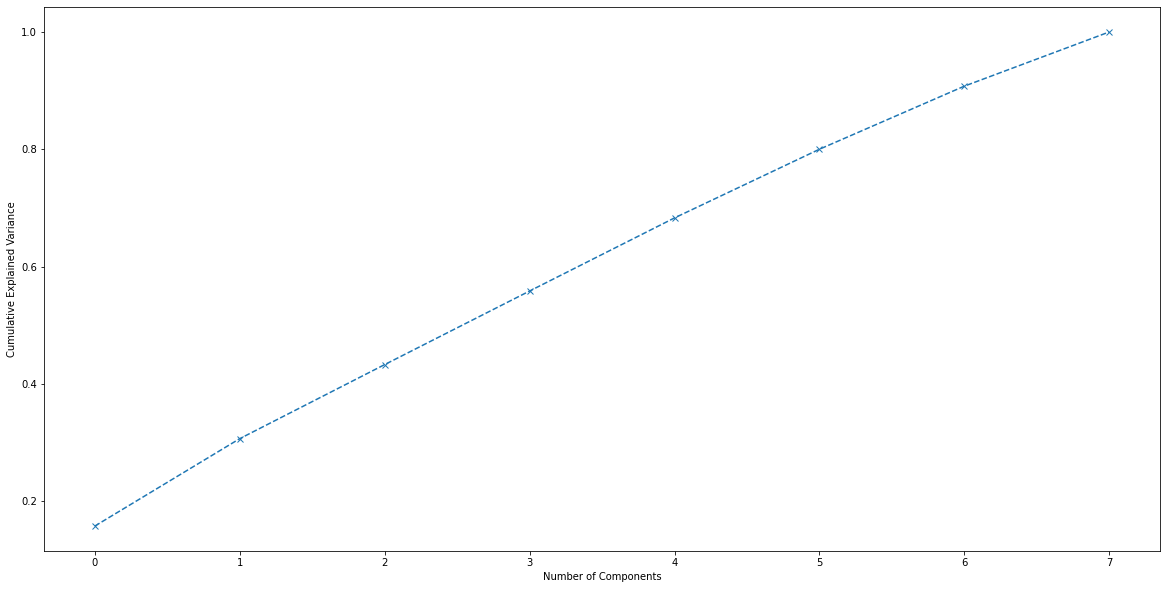

In [175]:
plt.figure(figsize=(20, 10))
variables=len(df_normal.axes[1])

plt.plot(range( variables), PCA_variability.cumsum(), marker='x', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')

Roughly 90 percent of the variance can be explained with 6 principal components.

Lets take a look at the correlation matrix for correlation of variable within each principal component. 

In [177]:
pca = PCA(n_components=6)
pca.fit(df_normal)

pca_components = pd.DataFrame(
    data=pca.components_.round(3),
    columns=columnNames,
    index=['component 1', 'component 2', 'component 3', 'component 4', 'component 5', 'component 6'])

pca_components

,CustAccountBalance,TransactionAmount (INR),Gender,age,day,month,hour,totalTransaction
component 1,0.115,0.069,0.016,0.150,0.695,0.690,0.009,-0.000
component 2,0.552,0.508,0.091,0.623,-0.126,-0.153,0.041,0.001
component 3,0.026,0.292,-0.931,-0.111,0.012,0.002,-0.184,0.031
component 4,-0.020,0.053,-0.133,-0.047,-0.005,0.008,0.662,-0.734
component 5,-0.013,0.033,-0.105,-0.048,-0.005,0.008,0.725,0.678
component 6,-0.660,0.718,0.215,-0.020,0.004,0.034,-0.025,0.010


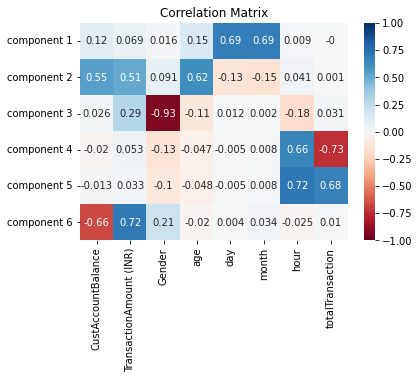

In [180]:
s = sns.heatmap(
    pca_components,
    vmin=-1,
    vmax=1,
    cmap='RdBu',
    annot=True
)
plt.title('Correlation Matrix')
plt.show()

With all principal compenents showing responsible for explaining relatviely the same amount of variance and each variable is present with a high correlation within at lease one of the principla components, I do not feel feature reduction is appropriate.



> **Side Note:** This is the first time I have seen a linear PCA graph.  



Thank you! 